In [1226]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [1227]:
data_10_in = pd.read_csv('dados_senoide_10hz.csv')
# data_100_in = pd.read_csv('dados_senoide_100hz.csv')
data_1_in = pd.read_csv('dados_senoide_1hz.csv')
data_01_in = pd.read_csv('dados_senoide_0.1hz.csv')

# data_rpm = pd.read_csv('dados_rpm_100hz.csv')
# data['Tempo'] = [float(x)*10**-6 for x in data['Tempo']]

# amostras = data_1_in['tensao'].values
# num_amostras = len(amostras)


In [1228]:
data_10_out = pd.read_csv('dados_rpm_10hz.csv')
data_1_out = pd.read_csv('dados_rpm_1hz.csv')
resposta = data_10_out['rpm']
# data_100_out = pd.read_csv('dados_rpm_100hz.csv')
# data_01_out = pd.read_csv('dados_rpm_0.1hz.csv')

amostras = data_10_in['tensao'].values
num_amostras = len(amostras)

In [1229]:
from scipy.signal import butter, filtfilt

freq_de_corte = 0.1 # Ajuste conforme necessário
ordem = 2

# Obter os coeficientes do filtro Butterworth
b, a = butter(ordem, freq_de_corte, btype='low', analog=False)

# Aplicar o filtro aos dados
resposta_filtrada = filtfilt(b, a, resposta)
resposta_filtrada = pd.DataFrame(resposta_filtrada)
resposta_filtrada = resposta_filtrada.values.flatten()

In [1230]:
import numpy as np
from scipy.signal import find_peaks

# Encontrar os índices dos picos positivos da senoide
peaks, _ = find_peaks(amostras)
# Calcular o número médio de amostras entre os picos
num_amostras_por_ciclo = np.mean(np.diff(peaks))

# A frequência de amostragem é o número de amostras por ciclo vezes a frequência da senoide
Fs = num_amostras_por_ciclo * 10
print(f"Frequência de amostragem estimada: {Fs} Hz")


Frequência de amostragem estimada: 1458.0 Hz


In [1231]:
# Gerar o vetor de tempo
# Gerar o vetor de tempo
t = np.arange(0, num_amostras / Fs, 1 / Fs)
t = np.array(t)
t = pd.DataFrame(t)

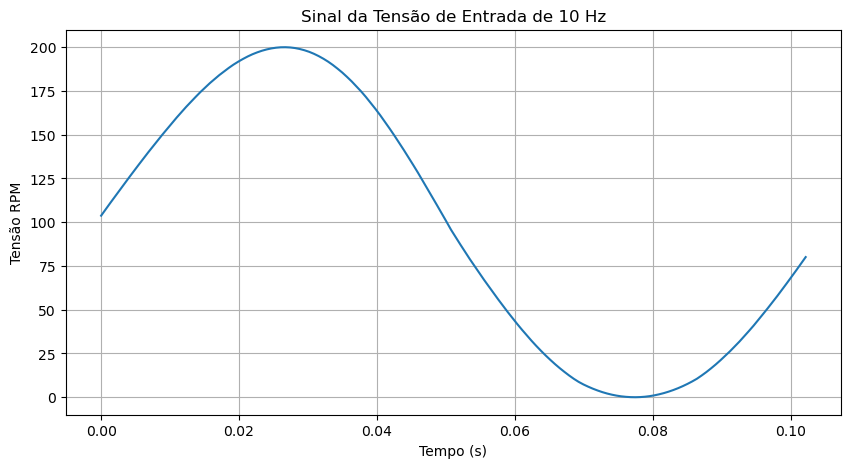

In [1232]:
import matplotlib.pyplot as plt


# Plotar o gráfico
plt.figure(figsize=(10,5))
plt.plot(t.iloc[:150], data_10_in['tensao'].iloc[:150])
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão RPM')
plt.title('Sinal da Tensão de Entrada de 10 Hz')
plt.grid(True)
plt.show()


In [1233]:
# Encontrar os índices dos picos positivos da senoide
peaks_out, _ = find_peaks(resposta_filtrada)
# Calcular o número médio de amostras entre os picos
num_amostras_por_ciclo_out = np.mean(np.diff(peaks_out))

# A frequência de amostragem é o número de amostras por ciclo vezes a frequência da senoide
Fs_out = num_amostras_por_ciclo_out * 10
print(f"Frequência de amostragem estimada: {Fs_out} Hz")

Frequência de amostragem estimada: 997.8431372549019 Hz


In [1234]:
# Gerar o vetor de tempo
num_amostras = len(resposta_filtrada)

t_out = np.arange(0, num_amostras / Fs, 1 / Fs)
t_out = np.array(t_out)
t_out = pd.DataFrame(t_out)

In [1235]:
resposta_filtrada = pd.DataFrame(resposta_filtrada)
print(resposta_filtrada.iloc[300:2000].max(), resposta_filtrada.iloc[300:2000].min())

0    7200.881633
dtype: float64 0    5030.362776
dtype: float64


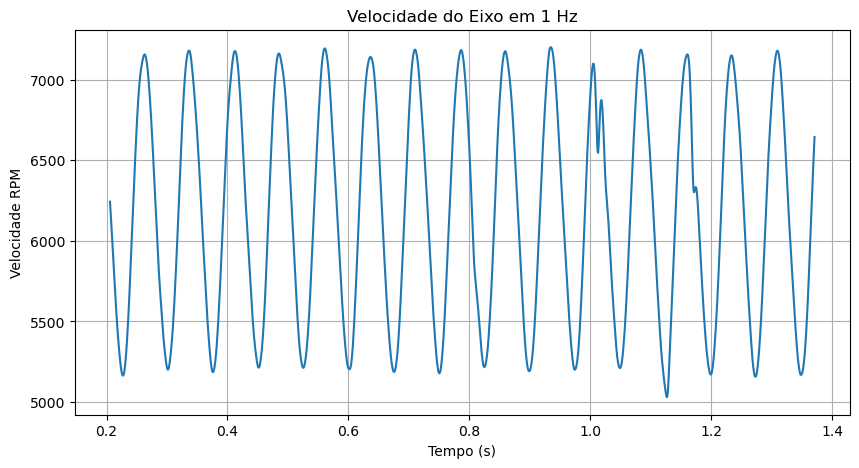

In [1236]:
plt.figure(figsize=(10,5))
# plt.plot(data['tempo'].iloc[5:100], data['tensao'].iloc[5:100], label= 'Senoide Ts = 1ms')
plt.plot(t_out.iloc[300:2000], resposta_filtrada.iloc[300:2000])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade RPM')
plt.title('Velocidade do Eixo em 1 Hz')
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


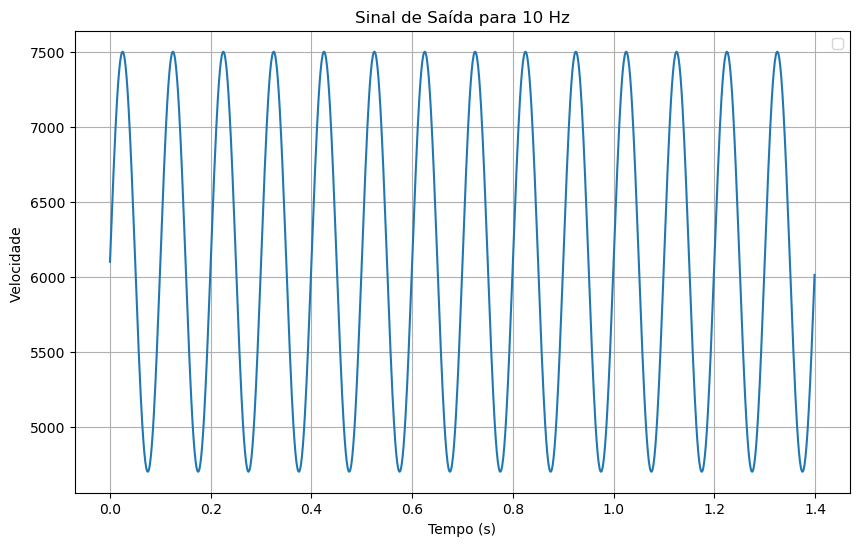

In [1237]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
frequencia = 10  # Frequência da senoide em Hz
fs = 1000  # Frequência de amostragem em Hz (número de amostras por segundo)
duracao = 1.4  # Duração em segundos
t = np.linspace(0, duracao, int(fs*duracao), endpoint=False)  # Vetor de tempo

# Amplitude e deslocamento
amplitude = (7500 - 4700) / 2  # Amplitude da variação
deslocamento = (7500 + 4700)/ 2  # Deslocamento vertical

# Gerando a senoide deslocada
senoide = amplitude * np.sin(2 * np.pi * frequencia * t) + deslocamento

# Plotando a senoide
plt.figure(figsize=(10, 6))
plt.plot(t, senoide)
plt.title('Sinal de Saída para 10 Hz')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade ')
plt.legend()
plt.grid(True)
plt.show()




In [1238]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
frequencia = 10  # Frequência da senoide em Hz
fs = 1000  # Frequência de amostragem em Hz (número de amostras por segundo)
duracao = 1.4  # Duração em segundos
t = np.linspace(0, duracao, int(fs*duracao), endpoint=False)  # Vetor de tempo

# Amplitude e deslocamento
# Amplitude e deslocamento
amplitude = (7500 - 1900) / 2  # Amplitude da variação
deslocamento = (7500 + 1900) / 2 

# Conversão da defasagem de 85 graus para radianos
defasagem_graus = - 46.4
defasagem_rad = np.deg2rad(defasagem_graus)

# Gerando a senoide com deslocamento e defasagem
senoide = amplitude * np.sin(2 * np.pi * frequencia * t + defasagem_rad) + deslocamento


t = pd.DataFrame(t)
senoide = pd.DataFrame(senoide)


In [1239]:
filtro = (t[t >= 0.2].dropna()).index[0]
print(filtro)

200


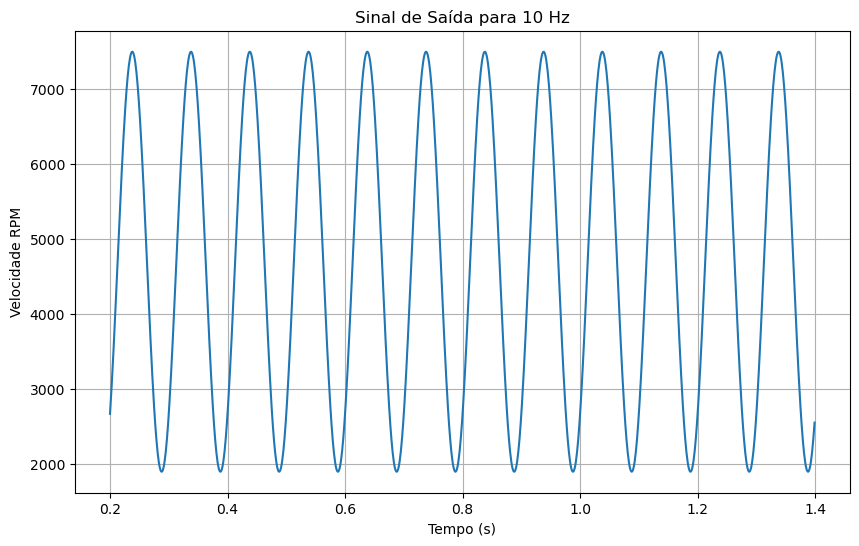

In [1240]:
plt.figure(figsize=(10, 6))
plt.plot(t.iloc[filtro:], senoide.iloc[filtro:])
plt.title('Sinal de Saída para 10 Hz')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade RPM')
plt.grid(True)
plt.show()